In [214]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile, assemble

In [215]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0,1)

In [216]:
qc.measure(range(2), range(2))

In [217]:
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [218]:
from qiskit_aer import Aer
from qiskit.primitives import (
    # Estimator,
    StatevectorEstimator,
)

In [219]:
for i in Aer.backends():
    print(i)

AerSimulator('aer_simulator')
AerSimulator('aer_simulator_statevector')
AerSimulator('aer_simulator_density_matrix')
AerSimulator('aer_simulator_stabilizer')
AerSimulator('aer_simulator_matrix_product_state')
AerSimulator('aer_simulator_extended_stabilizer')
AerSimulator('aer_simulator_unitary')
AerSimulator('aer_simulator_superop')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


In [220]:
backend = Aer.get_backend('qasm_simulator')

In [221]:
# estimator_v2 = StatevectorEstimator()
sampler_v2 = StatevectorSampler()

In [222]:
sampler.backend

QasmSimulator('qasm_simulator')

In [223]:
sampler.options

Options(default_shots=1024, seed_simulator=None, run_options=None)

In [224]:
help(sampler_v2.run)

Help on method run in module qiskit.primitives.statevector_sampler:

run(pubs: 'Iterable[SamplerPubLike]', *, shots: 'int | None' = None) -> 'PrimitiveJob[PrimitiveResult[SamplerPubResult]]' method of qiskit.primitives.statevector_sampler.StatevectorSampler instance
    Run and collect samples from each pub.

    Args:
        pubs: An iterable of pub-like objects. For example, a list of circuits
              or tuples ``(circuit, parameter_values)``.
        shots: The total number of shots to sample for each sampler pub that does
               not specify its own shots. If ``None``, the primitive's default
               shots value will be used, which can vary by implementation.

    Returns:
        The job object of Sampler's result.



In [225]:
job = sampler_v2.run([qc], shots=1024)

In [226]:
res = job.result()

In [227]:
x = res[0].data['c'] or None

In [228]:
counts = x.get_counts()

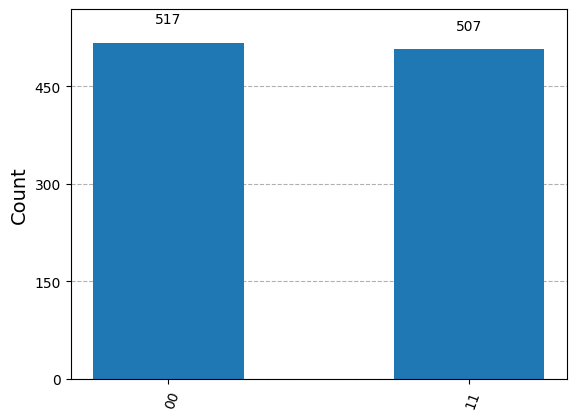

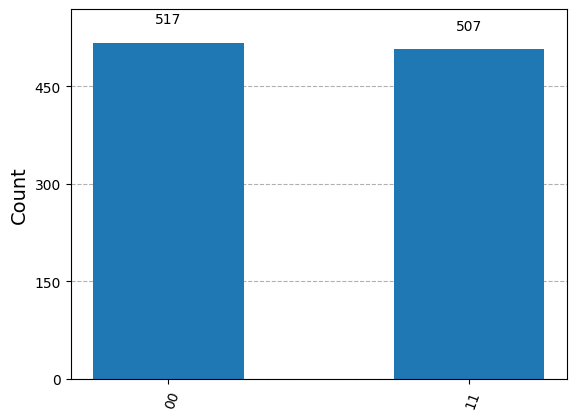

In [230]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)